# Data Exploration

In [ ]:
import google.datalab.bigquery as bq
import pandas as pd

## Perform queries to BigQuery
You can use datalab bigquery connector to make queries from python and collect the results in a __Pandas Dataframe__:
run the following cell and inspect the content of `df['arrival_delay_deciles']`

In [30]:
query="""
SELECT
  departure_delay,
  COUNT(1) AS num_flights,
  APPROX_QUANTILES(arrival_delay, 10) AS arrival_delay_deciles
FROM
  `bigquery-samples.airline_ontime_data.flights`
GROUP BY
  departure_delay
HAVING
  num_flights > 100
ORDER BY
  departure_delay ASC
"""


df = bq.Query(query).execute().result().to_dataframe()
df.head()

,departure_delay,num_flights,arrival_delay_deciles
0,-37.0,107,"[-66.0, -44.0, -41.0, -35.0, -30.0, -23.0, -17..."
1,-36.0,139,"[-74.0, -43.0, -39.0, -37.0, -32.0, -25.0, -18..."
2,-35.0,191,"[-68.0, -45.0, -40.0, -36.0, -28.0, -19.0, -14..."
3,-34.0,195,"[-58.0, -44.0, -40.0, -35.0, -30.0, -25.0, -19..."
4,-33.0,227,"[-59.0, -43.0, -39.0, -36.0, -32.0, -28.0, -20..."


In [31]:
type(df['arrival_delay_deciles'][0])

list

## Obtain a new dataframe
`df['arrival_delay_deciles']` is a __Pandas Series__ containing a __list__ of values for each row. Apply `pd.Series` to obtain a new Pandas Dataframe

In [32]:
percentiles = df['arrival_delay_deciles'].apply(pd.Series)
percentiles.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-66.0,-44.0,-41.0,-35.0,-30.0,-23.0,-17.0,-12.0,-3.0,6.0,33.0
1,-74.0,-43.0,-39.0,-37.0,-32.0,-25.0,-18.0,-14.0,-7.0,2.0,49.0
2,-68.0,-45.0,-40.0,-36.0,-28.0,-19.0,-14.0,-8.0,-4.0,3.0,85.0
3,-58.0,-44.0,-40.0,-35.0,-30.0,-25.0,-19.0,-14.0,-8.0,2.0,39.0
4,-59.0,-43.0,-39.0,-36.0,-32.0,-28.0,-20.0,-14.0,-7.0,5.0,25.0


## Plotting
1. change the name of the columns to mirror the percentages
2. drop minimum and maximum (columns '0%' and '100%')
3. plot using 'departure_delay' on x axis

In [33]:
percentiles = percentiles.rename(columns = lambda x : str(x*10) + "%")
percentiles = pd.concat([df['departure_delay'], percentiles], axis=1)
percentiles.head()

,departure_delay,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,-37.0,-66.0,-44.0,-41.0,-35.0,-30.0,-23.0,-17.0,-12.0,-3.0,6.0,33.0
1,-36.0,-74.0,-43.0,-39.0,-37.0,-32.0,-25.0,-18.0,-14.0,-7.0,2.0,49.0
2,-35.0,-68.0,-45.0,-40.0,-36.0,-28.0,-19.0,-14.0,-8.0,-4.0,3.0,85.0
3,-34.0,-58.0,-44.0,-40.0,-35.0,-30.0,-25.0,-19.0,-14.0,-8.0,2.0,39.0
4,-33.0,-59.0,-43.0,-39.0,-36.0,-32.0,-28.0,-20.0,-14.0,-7.0,5.0,25.0


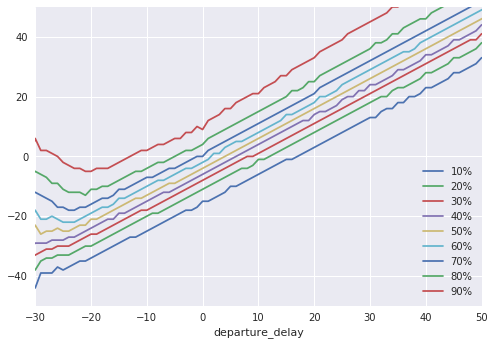

In [34]:
percentiles = percentiles.drop(['0%', '100%'], 1)
percentiles.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));